In [8]:
from tree_detection_framework.preprocessing.preprocessing import (
    create_dataloader,
    visualize_dataloader,
)
from tree_detection_framework.detection.detector import GeometricDetector
from tree_detection_framework.postprocessing.postprocessing import (
    merge_and_postprocess_detections,
    multi_region_hole_suppression,
    single_region_hole_suppression,
)

In [2]:
dataloader = create_dataloader(
    raster_folder_path="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/chm.tif",
    chip_size=512,
    chip_stride=400,
    batch_size=3,
    output_resolution=0.2,
)

2024-12-09 22:23:16,106 - INFO - Units = Units.PIXELS
2024-12-09 22:23:16,106 - INFO - Stride = 400


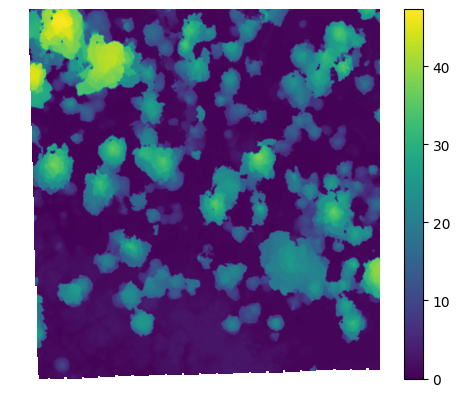

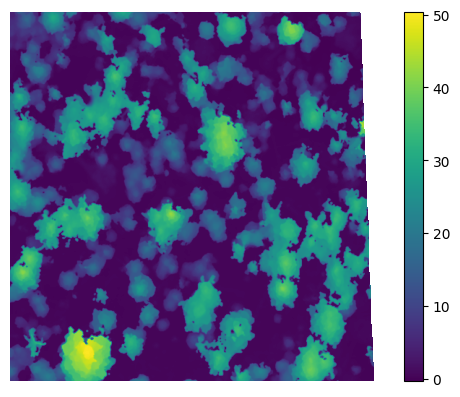

In [4]:
visualize_dataloader(dataloader, 2)

In [5]:
detector = GeometricDetector(a=0.0045, res=dataloader.sampler.res)
predictions = detector.predict(dataloader)

Performing prediction on batches: 100%|██████████| 6/6 [01:37<00:00, 16.21s/it]


Plotting the raw predictions before post-processing
--

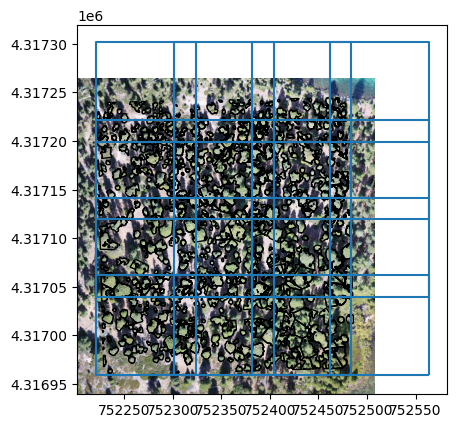

<Axes: >

In [4]:
predictions.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

After suppressing polygon holes
--

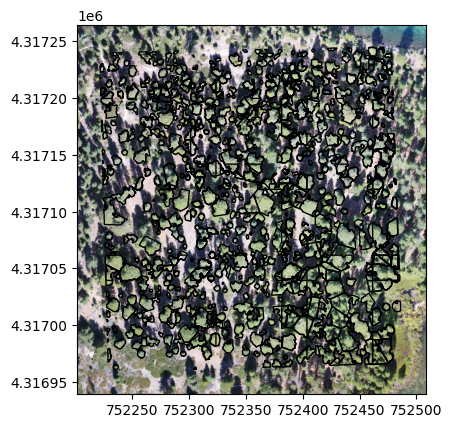

<Axes: >

In [6]:
hole_suppressed = multi_region_hole_suppression(
    predictions
)  # returns a RegionDetectionsSet

hole_suppressed.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

Another way to post-process: Merging and simplifying crowns
---
This performs polygon hole supression within the function

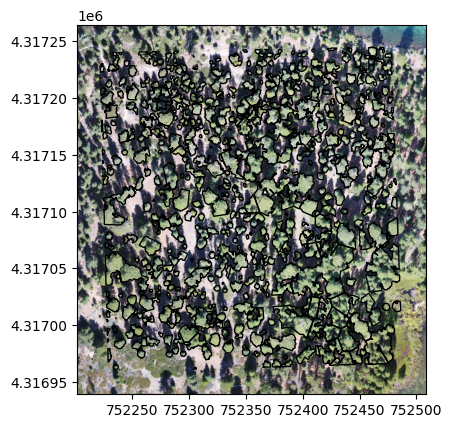

<Axes: >

In [7]:
postprocessed = merge_and_postprocess_detections(
    predictions, crs=dataloader.dataset.crs
)

postprocessed.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

In [6]:
postprocessed.save(
    "/ofo-share/repos-amritha/extras/tdf/output_gpkgs/geometric_detections_multipolygon_filtered.gpkg"
)

2024-12-05 20:20:01,667 - INFO - Created 547 records


Single region hole suppression
--

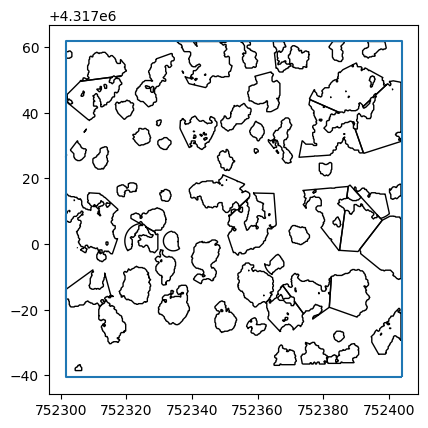

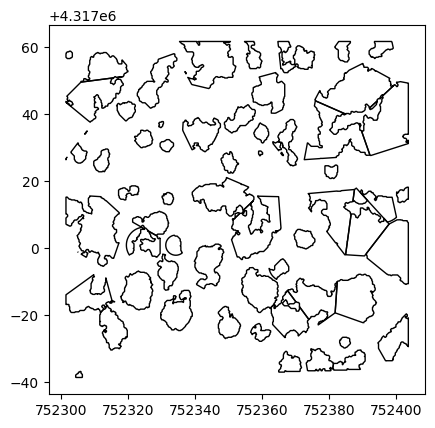

<Axes: >

In [11]:
# Get a RegionDetections object
region = predictions.region_detections[1]
region.plot()  # Before

postprocessed_region = single_region_hole_suppression(region)
postprocessed_region.plot()  # After